# 2. Disease prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.0 EDA uppvärmning

In [2]:
df = pd.read_csv("../Labb/Disease_prediction/cardio_train.csv", sep=";")

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
# since age column in days, we convert it to years and then back to int

df["age"] = round(df["age"]/365).astype(int) 

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


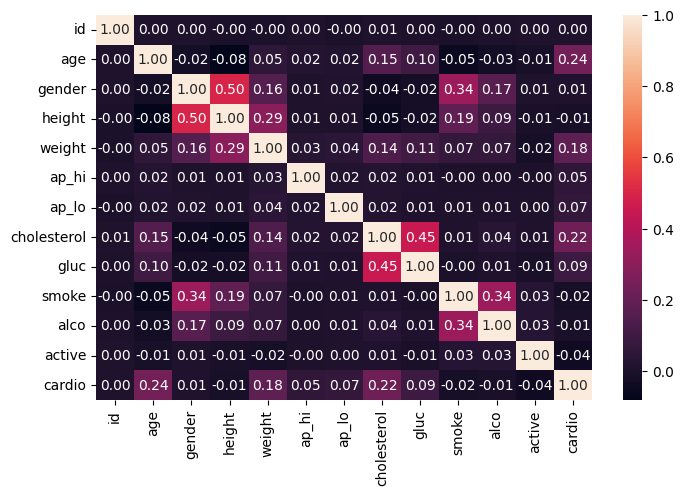

In [4]:
corr = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [5]:
# find higest and lowest correlation outside of the diagonal

corr = corr.abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
corr = corr[corr["level_0"] != corr["level_1"]]
corr.columns = ["feature1", "feature2", "corr"]

In [6]:
# removes all rows with dupplicate correlation values
corr = corr.drop_duplicates(subset=["corr"], keep="first")

In [7]:
corr.sort_values("corr", ascending=False)
corr = corr.reset_index(drop=True)
corr # highest correlation to lowest

,feature1,feature2,corr
0,height,gender,0.499033
1,cholesterol,gluc,0.451578
2,alco,smoke,0.340094
3,gender,smoke,0.338135
4,height,weight,0.290968
...,...,...,...
73,id,weight,0.001830
74,ap_hi,alco,0.001408
75,alco,id,0.001210
76,smoke,ap_hi,0.000922


In [8]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
#sns.pairplot(df)

<Axes: xlabel='id', ylabel='weight'>

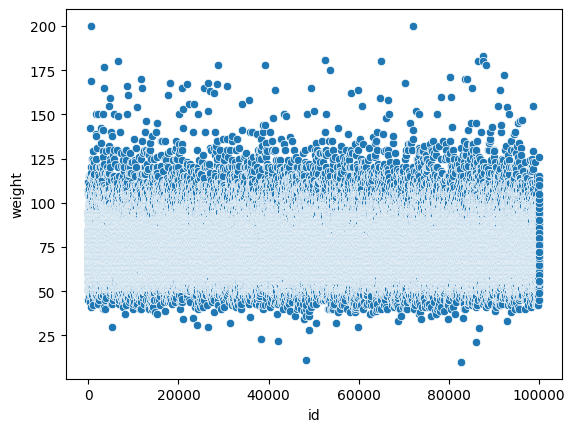

In [10]:
sns.scatterplot(x="id", y="weight", data=df)

In [11]:
df.isnull().sum() # no missing values

df.duplicated().sum() # no duplicates

df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# 2.0 EDA

In [12]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


35021 people are negative
34979 people are positive


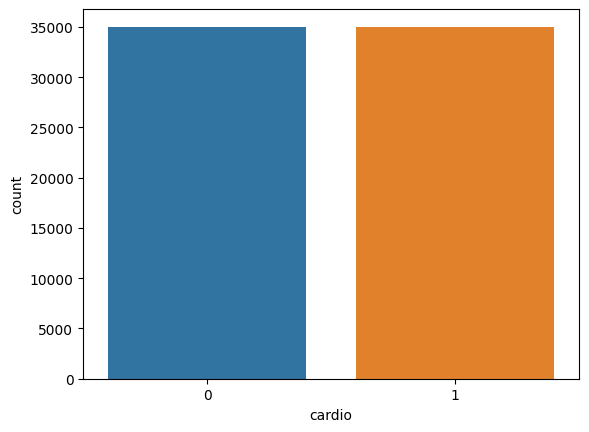

In [13]:
sns.countplot(x="cardio", data=df);
print(f"{df['cardio'][df['cardio']== 0].count()} people are negative")
print(f"{df['cardio'][df['cardio']== 1].count()} people are positive")
# pretty much 50/50

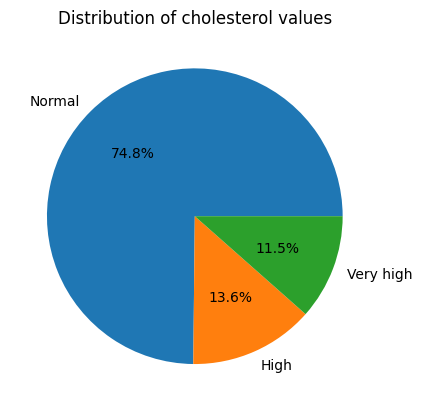

In [14]:
# Uses value_counts() to count the number of each value in the column

labels = ["Normal", "High", "Very high"]
plt.pie(df["cholesterol"].value_counts(), labels=labels, autopct="%1.1f%%")
plt.title("Distribution of cholesterol values")
plt.show()

In [15]:
df['cholesterol'].value_counts(1) # checking the distribution for each number

1    0.748357
2    0.136414
3    0.115229
Name: cholesterol, dtype: float64

Text(0.5, 1.0, 'Distribution of age')

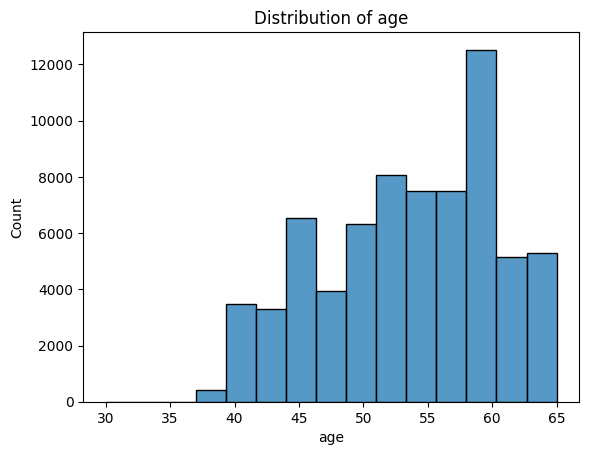

In [16]:
sns.histplot(x="age", data=df, bins=15).set_title("Distribution of age")

Text(0.5, 1.0, 'Distribution of smokers')

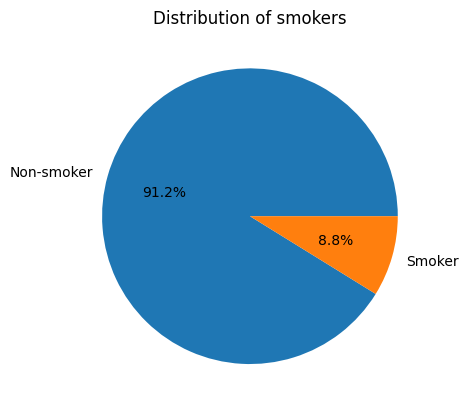

In [17]:
labels = ["Non-smoker", "Smoker"]
plt.pie(df["smoke"].value_counts(), labels=labels, autopct="%1.1f%%");
plt.title("Distribution of smokers")

Text(0.5, 1.0, 'Distribution of weight')

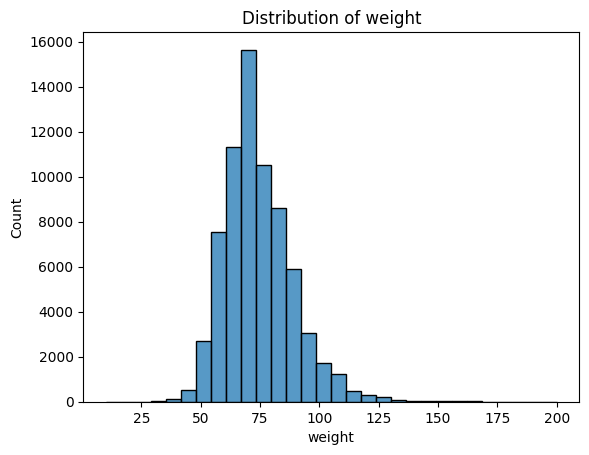

In [18]:
sns.histplot(x=df['weight'], bins=30).set_title("Distribution of weight")

Text(0.5, 1.0, 'Distribution of Height')

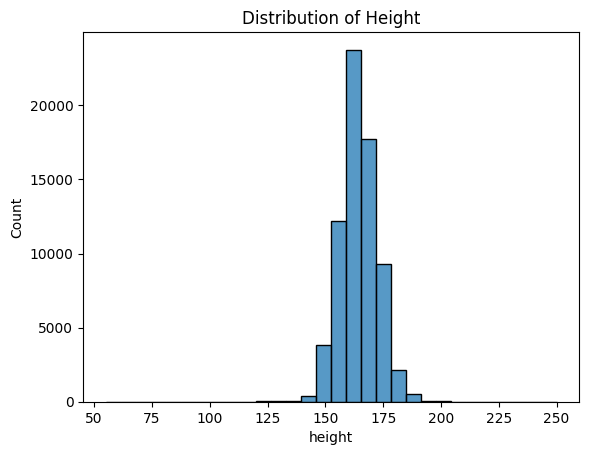

In [19]:
# distribution of weight, and remove outliers
sns.histplot(x=df['height'], bins=30).set_title("Distribution of Height")

<Axes: title={'center': 'Distribution of weight & height'}, xlabel='weight', ylabel='Count'>

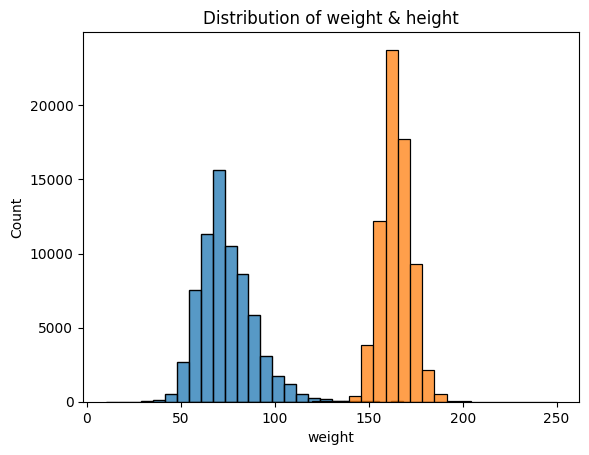

In [20]:
sns.histplot(x=df['weight'], bins=30).set_title("Distribution of weight & height")
sns.histplot(x=df['height'], bins=30)

### Women - 1
### Men - 2

In [21]:
# plot the distribution of gender
df[df['cardio'] == 0]['gender'].value_counts()

1    22914
2    12107
Name: gender, dtype: int64

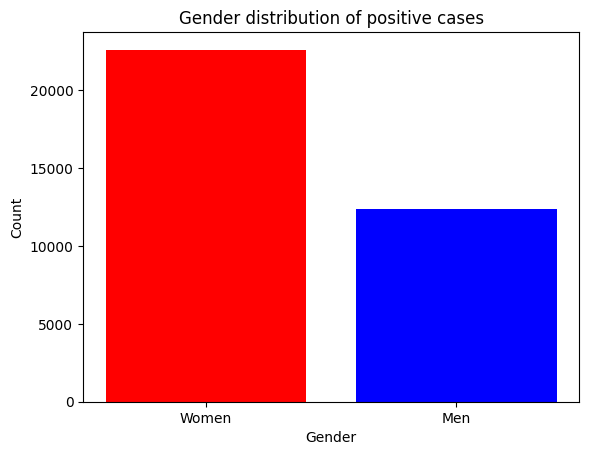

In [22]:
df_pos = df[df['cardio'] == 1]
gender_count = df_pos.groupby(['gender'])['id'].count()

plt.bar(gender_count.index, gender_count.values, color=['red', 'blue'])
plt.title("Gender distribution of positive cases")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks([1,2], ['Women', 'Men'])
plt.show()


# 2.1.0 Feature engineering BMI

In [23]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [24]:
# create two new columns: BMI and BMI category
# formula on wikipage is for meter squared that's why we divide by 100

df['BMI'] = df['weight'] / (df['height']/100)**2

- Checking the graph of BMI's on wiki page, we can have our lower and upper limit set to 15 and 50
- Also checked my height & weight, and how much i would need to weigh in order to be within the range.
- limits that are set seem to be reasonable

In [25]:
df['BMI'].min(), df['BMI'].max() # checking outliers

(3.471783865673526, 298.6666666666667)

In [26]:
# remove outliers that are below 15 and above 50
df = df[df['BMI'] > 15]
df = df[df['BMI'] < 50]

df['BMI'].min(), df['BMI'].max()

(15.012197410395949, 49.99999999999999)

In [27]:
# creates a new column for BMI category: [1 - normal range, 2 - overweight, 3 - obese]
# found this really cool way to do it with lambda function
# Source: https://stackoverflow.com/questions/59523793/python-create-a-new-column-using-multiple-conditions

df['BMI_category'] = df['BMI'].apply(lambda x: 1 if x < 25 else 2 if x < 30 else 3)

In [28]:
df['BMI_category'].value_counts()

1    26413
2    25086
3    18230
Name: BMI_category, dtype: int64

# 2.1.1 Feature engineering bloodtryck

In [29]:
print(df['ap_hi'].min(), df['ap_hi'].max()) # checking outliers
print(df['ap_lo'].min(), df['ap_lo'].max())

-150 16020
-70 11000


In [30]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_category
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,1
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,3
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,2
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,58,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,2
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,2
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,3
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,2


In [31]:
# removing outliers
# set the limits for systolic blood pressure to 90-200 and for diastolic blood pressure to 60-145
# From what I can find, you have hypotension (low blood pressure) if you go below 90/60.
df = df[df['ap_hi'] > 90]
df = df[df['ap_hi'] < 200] # set it to 200 since the next highest recorded value in the dataset is 197 for systolic blood pressure
# and systolic pressure above 180 is potentially life-threatening, which means not alot of people will have a systolic blood pressure above 200

# diastolic blood pressure limits
# From what I can find, you have hypotension (low blood pressure) if you go below 60 diastolic blood pressure.
df = df[df['ap_lo'] > 60]
df = df[df['ap_lo'] < 145] # set the limit to 145 since the highest recorded value in the dataset is 140 for diastolic blood pressure

# Since the systolic blood pressure is always higher than the diastolic blood pressure, we can remove all rows where the diastolic blood pressure is higher than the systolic blood pressure
df = df[df['ap_hi'] > df['ap_lo']]
df['BP_category'] = df['ap_hi'].apply(lambda x: 1 if x < 120 else 2 if x < 130 else 3 if x < 140 else 4 if x < 180 else 5)
df['BP_category'] = df['ap_lo'].apply(lambda x: 1 if x < 80 else 2 if x < 85 else 3 if x < 90 else 4 if x < 120 else 5)


In [32]:
df['ap_lo'].min(), df['ap_lo'].max() # highest and lowest for both systolic and diastolic blood pressures, no outliers left

(61, 140)

# 2.2.0 Visualiseringar andel sjukdomar